In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

### Lectura de datos por medio de "pandas"

In [19]:
data1 = pd.read_csv('/home/andres/Documents/Maestria/mathematics_model/Fandango/fandango_score_comparison.csv')
data2 = pd.read_csv('/home/andres/Documents/Maestria/mathematics_model/Fandango/fandango_scrape.csv')
type(data1)

pandas.core.frame.DataFrame

### Datos que se van analizar 

In [18]:
data1.head(n=5) 

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [17]:
data2.head(n=5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


### Convertir los datos de pandas a numpy

In [20]:
fandango = data2.values
comparison= data1.values
type(fandango)

numpy.ndarray

## Procesamiento de los datos 

En este ejercicio se requiere extraer ciertos datos de interes a partir de la información dada. Esta información corresponde a los ratings de algunas películas. La información requerida o que se desea filtrar pertenece a las películas que tienen mas de 30 "reviews" y que sean del año 2015. 

### Filtrado para Fandango 

In [21]:
filtro1 = fandango[:,3]>30         # True para las peliculas que tienen +30 reviews
pel_M30 = fandango[filtro1,:]      # Peliculas con +30 reviews 
año = [pel_M30[:,0][i][-5:-1] for i in range(np.shape(pel_M30)[0])] # De "pel_M30" guarda en "año" el año de la pélicula
filtro2 = [año[i] =='2015' for i in range(np.shape(año)[0])] # True para las peliculas de 2015
pel_2015 = pel_M30[filtro2,:]  # Peliculas de 2015 con +30 reviews


Una vez obtenido los datos deseados (películas con +30 reviews y del año 2015) (**pel_2015**) se cálcula cuántas películas corresponden a cierto número de estrellas. Donde las estrellas, es un criterio para calificar la película, donde 5.0 estrellas es la calificación mas alta. 

In [14]:
stars = np.arange(0,5.5,0.5) # estrellas 
N_pel = [np.sum((pel_2015[:,1] == s)*100)/np.shape(pel_2015)[0] for s in stars ] # número de peliculas por estrellas


## Gráficos 

### Para los datos de Fandango 

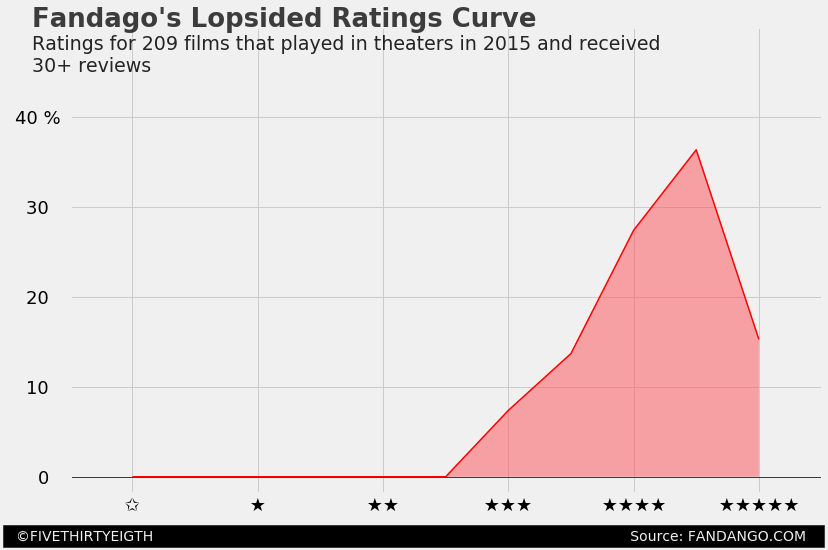

In [35]:
fig = plt.figure(figsize = (12,8))
fte_graph = fig.add_subplot(111)
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Personalizar la etiquetas del eje y
fte_graph.set_yticklabels(labels = [ '0   ', '10   ', '20   ','30   ', '40 % '])
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.0, alpha = .7)
fte_graph.set_xlim(left = -0.5, right = 5.5)
fte_graph.xaxis.label.set_visible(False)

# Genera una barra para especificar la fuente 
fte_graph.text(x = -1.0, y = -7,
    s = '  ©FIVETHIRTYEIGTH                                                                                                          Source: FANDANGO.COM   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'black')
# Añadir título y subtitulo 
fte_graph.text(x = -0.8, y = 50, s = "Fandago's Lopsided Ratings Curve",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = -0.8, y = 45, 
               s = 'Ratings for 209 films that played in theaters in 2015 and received \n30+ reviews',
              fontsize = 19, alpha = .85)


plt.plot(stars,N_pel,linewidth=1.5, color='red')
plt.yticks(np.arange(0, 55, 10))

# etiquetar el eje x con estrellas 
indice = np.arange(6)   # Declara un array
plt.xticks(indice, (" ✩ ", " ★ ", " ★★ ", " ★★★ ", " ★★★★ "," ★★★★★ "))   

# Por medio del método Polygon se calcula el area bajo la curva para ser rellenada 
verts = [(0, 0)] + list(zip(stars, N_pel)) + [(5, 0)]
poly = Polygon(verts, facecolor='#ff5157',alpha=.5)
fte_graph.add_patch(poly)



### Para la comparación de ratings con Fandango 

A partir de los datos **comparison** definidos anteriormente, se hace los mismo que con los datos de **fandango**. A excepción de los pasos de filtrado. Ya que se requieren todos los datos para obtener la gráfica deseada, la cual tiene calificaciones para 146 películas.

In [111]:
stars = np.arange(0,5.5,0.5) # estrellas 

# número de peliculas por estrellas
N_pel1 = [np.sum((comparison[:,6] == s)*100)/np.shape(comparison)[0] for s in stars ] 
N_pel2 = [np.sum((comparison[:,13] == s)*100)/np.shape(comparison)[0] for s in stars ]
N_pel3 = [np.sum((comparison[:,14] == s)*100)/np.shape(comparison)[0] for s in stars ]
N_pel4 = [np.sum((comparison[:,15] == s)*100)/np.shape(comparison)[0] for s in stars ]
N_pel5 = [np.sum((comparison[:,16] == s)*100)/np.shape(comparison)[0] for s in stars ]
N_pel6 = [np.sum((comparison[:,17] == s)*100)/np.shape(comparison)[0] for s in stars ]


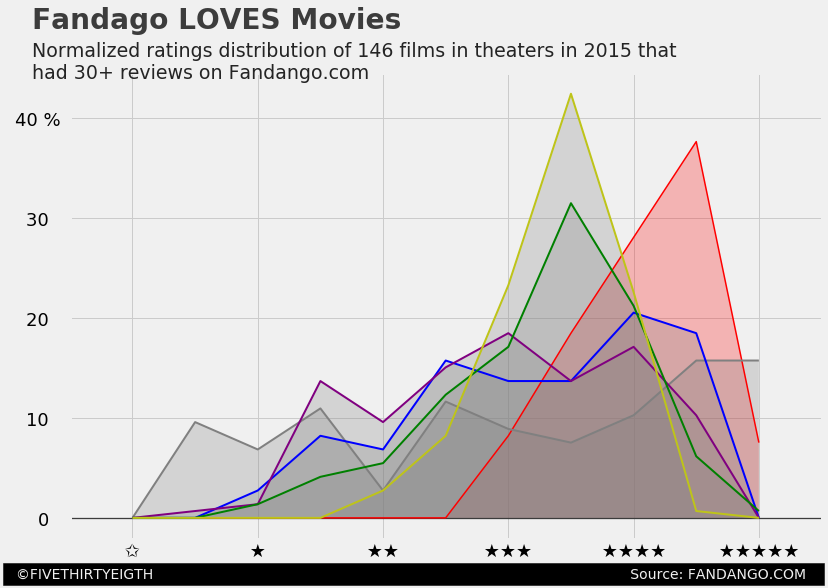

In [310]:
fig = plt.figure(figsize = (12,8))
fte_graph = fig.add_subplot(111)
fte_graph.tick_params(axis = 'both', which = 'major', labelsize = 18)
fte_graph.set_yticklabels(labels = [0, '0   ', '10   ', '20   ', '30   ', '40 % '])
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.set_xlim(left = -0.5, right = 5.5)
fte_graph.xaxis.label.set_visible(False)

fte_graph.text(x = -1.0, y = -6,
    s = '  ©FIVETHIRTYEIGTH                                                                                                          Source: FANDANGO.COM   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'black')

fte_graph.text(x = -0.8, y = 49, s = "Fandago LOVES Movies",
               fontsize = 28, weight = 'bold', alpha = .75)
fte_graph.text(x = -0.8, y = 44, 
               s = 'Normalized ratings distribution of 146 films in theaters in 2015 that \nhad 30+ reviews on Fandango.com',
              fontsize = 19, alpha = .85)


plt.plot(stars,N_pel1,linewidth=1.5, color='red')
plt.plot(stars,N_pel2,linewidth=2.0, color='gray')
plt.plot(stars,N_pel3,linewidth=2.0, color='blue')
plt.plot(stars,N_pel4,linewidth=2.0, color='purple')
plt.plot(stars,N_pel5,linewidth=2.0, color='green')
plt.plot(stars,N_pel6,linewidth=2.0, color='#bec419')

indice = np.arange(6)   # Declara un array
plt.xticks(indice, (" ✩ ", " ★ ", " ★★ ", " ★★★ ", " ★★★★ "," ★★★★★ ")) 

verts = [(0, 0)] + list(zip(stars, N_pel1)) + [(5, 0)]
poly = Polygon(verts, facecolor='red',alpha=.25)
fte_graph.add_patch(poly)

verts = [(0, 0)] + list(zip(stars, N_pel2)) + [(5, 0)]
poly = Polygon(verts, facecolor='gray',alpha=.25)
fte_graph.add_patch(poly)

verts = [(0, 0)] + list(zip(stars, N_pel3)) + [(5, 0)]
poly = Polygon(verts, facecolor='gray',alpha=.25)
fte_graph.add_patch(poly)

verts = [(0, 0)] + list(zip(stars, N_pel4)) + [(5, 0)]
poly = Polygon(verts, facecolor='gray',alpha=.25)
fte_graph.add_patch(poly)

verts = [(0, 0)] + list(zip(stars, N_pel5)) + [(5, 0)]
poly = Polygon(verts, facecolor='gray',alpha=.25)
fte_graph.add_patch(poly)

verts = [(0, 0)] + list(zip(stars, N_pel6)) + [(5, 0)]
poly = Polygon(verts, facecolor='gray',alpha=.25)
fte_graph.add_patch(poly)

